In [2]:
library(pheatmap)

In [4]:
data <- read.csv("./Result_NvP53/NvP53_AtacRna_KoWt_Final_20221008/Explain/ct_tf_influe.rna.csv",row.names = 1,check.names = F)
data <- t(data)
dim(data); data[1:5,1:4]

[1] 809 242

,P53_0,P53_1,P53_10,P53_100
4921501E09Rik,1.141056,-1.0933906,0.04212461,-2.4602579
AW822073,-1.526290,-0.3076143,-1.03647700,-0.6737033
Ahr,1.287314,2.0192685,1.33202153,1.8167805
Alx1,-1.526290,-0.3076143,-1.03647700,-0.6737033
Alx3,-1.526290,-0.3076143,-1.03647700,-0.6737033


In [5]:
Ann <- read.table("./CelltypeANN_0510",sep = "\t")
Ann[1:2,]

Ann_P53 <- Ann
Ann_WT <- Ann


V1,V2,V3
0,T cell,Immune
1,Fibroblast,Stromal


In [6]:
Ann_P53$Celltype <- paste("P53",Ann_P53$V1,sep = "_")
Ann_WT$Celltype <- paste("WT",Ann_WT$V1,sep = "_")
Ann_P53$Type <- "P53"
Ann_WT$Type <- "WT"

p53_tf <- data[,grep("P53",colnames(data))]
wt_tf <- data[,grep("WT",colnames(data))]

In [7]:
total_tf <- cbind(p53_tf,wt_tf)
total_Ann <- rbind(Ann_P53,Ann_WT)

Ann_USE <- total_Ann

rownames(Ann_USE) <- Ann_USE$Celltype
Ann_USE <- Ann_USE[-which(Ann_USE$V3 == "Other"),]

total_tf <- as.data.frame(total_tf)
total_tf_temp<- total_tf[,as.character(intersect(colnames(total_tf),Ann_USE$Celltype))]
Ann_USE <- Ann_USE[as.character(colnames(total_tf_temp)),]

Ann_USE_p53 <- Ann_USE[Ann_USE$Type == "P53",]
Ann_USE_p53 <- Ann_USE_p53[order(Ann_USE_p53$V3),]

Ann_USE_WT <- Ann_USE[Ann_USE$Type == "WT",]
Ann_USE_WT <- Ann_USE_WT[order(Ann_USE_WT$V3),]
Ann_USE <- rbind(Ann_USE_p53,Ann_USE_WT)
total_tf_temp <- total_tf_temp[,Ann_USE$Celltype,]

In [8]:
Lineage = factor(Ann_USE$V3)
Type <- factor(Ann_USE$Type)
ann_row <- data.frame(
  Type = Type,
  Lineage = Lineage
  
)
rownames(ann_row) <- colnames(total_tf_temp)

In [9]:
color_regions = c("#E6AB02", "#66A61E", "#D95F02", "#1B9E77", "#E7298A", "#E31A1C", "#A6761D", "#B2DF8A", "#FFFF99", "#7570B3", "#FF7F00", "#A65628", "#B3CDE3", "#BC80BD", "#A6CEE3","#984EA3", "#CCEBC5","#E41A1C","#4DAF4A","#BEBADA","#B3DE69","#CAB2D6","#FFFFB3","#33A02C","#B15928", "#6A3D9A","#FBB4AE","blue","#FB8072","#FFFF33","#CCEBC5","#A6761D","#2c7fb8","#fa9fb5","#BEBADA")
names(color_regions) = c("Secretory" ,"Muscle" ,"Neuron" ,"Immune" , "Epithelial","Glia","Proliferating","Immune","Parenchymal","Stromal","Phagocytes","Pharynx","Rectum","Coelomocytes","Intestine","Hepatocyte","Germline","Endothelial","Erythoid ","Testis","Unknown","Midgut","Hemocytes" ,"Hindgut","Embryo","Fat","SalivaryGland","Gastrodermis","DigFilaments","Pigment","BasementMembrane","Endoderm","Mesenchyme","FatBody","Female")
color_regions_use = color_regions[as.character(levels(Lineage))]
which(is.na(color_regions_use))

annotion_colors <- list(
  Type =  c(P53 = "#FF9200FF", WT= "#105BA2"),
  Lineage = color_regions_use
)

named integer(0)

png 
  2

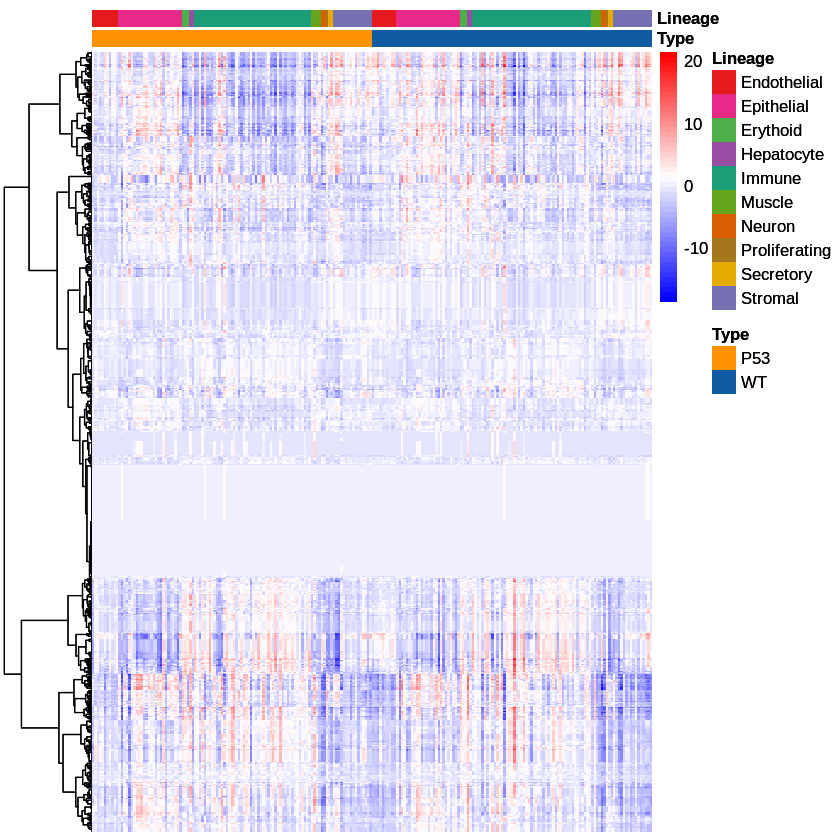

In [11]:
#top <- reshape2::melt(as.matrix(total_tf_temp))
#top <- top[top$value >=3,]
#temp <- total_tf_temp[as.character(unique(top$Var1)),]
temp <- total_tf_temp

temp[temp>30] = 30
temp[temp < -35] = -35
library(pheatmap)
#color_use <- colorRampPalette(c("darkblue","blue","white","white","red","darkred"))(50)
color_use <- colorRampPalette(c("blue","white","red"))(50)

t1 <- pheatmap(temp,
               cluster_cols = F,
               clustering_method = "ward.D2",
               color = color_use,
               annotation_colors = annotion_colors,
               show_rownames = F,
               show_colnames = F,
               annotation_col = ann_row)
t1

out_pdf <- "./Figure_ct_tf_influe.rna_pheatmap.pdf"
pdf(out_pdf,w=10,h=10)
print(t1)
dev.off()

temp <- temp[t1$tree_row$order,]
write.table(temp,"Figure_ct_tf_influe.rna_pheatmap.txt",sep = "\t",quote = F)
